In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
torch.cuda.is_available()

True

In [3]:
# hyperparams
inp_dim = 32 * 32 * 3
#try to use other model params. check overfitting with large models
hidden = 350
out_dim = 60
device = 'cuda' if torch.cuda.is_available() else 'cpu'
n_epochs = 10
batch_size = 128

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize((0.5), (0.5)),
     ])


dataset_train = datasets.CIFAR10('.',
                               train=True,            
                               download=True, 
                               transform=transform)
trainloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

dataset_test = datasets.CIFAR10('.',
                              train=False,
                              download=True,
                              transform=transform)
testloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
dataset_test[555]

(tensor([[[0.5255, 0.5255, 0.5333,  ..., 0.6196, 0.6196, 0.6000],
          [0.5176, 0.4941, 0.5020,  ..., 0.6706, 0.6902, 0.6745],
          [0.5098, 0.4784, 0.4824,  ..., 0.7569, 0.7059, 0.6784],
          ...,
          [0.3216, 0.2824, 0.2902,  ..., 0.3647, 0.3843, 0.4078],
          [0.3098, 0.2902, 0.2863,  ..., 0.3882, 0.4078, 0.3961],
          [0.4706, 0.4353, 0.4275,  ..., 0.3725, 0.3882, 0.4078]],
 
         [[0.5882, 0.6118, 0.6235,  ..., 0.7020, 0.7137, 0.6863],
          [0.6078, 0.6078, 0.6196,  ..., 0.8196, 0.8510, 0.8353],
          [0.6235, 0.6118, 0.6235,  ..., 0.9098, 0.8824, 0.8549],
          ...,
          [0.3333, 0.3059, 0.3176,  ..., 0.4235, 0.4314, 0.4471],
          [0.3098, 0.3020, 0.3059,  ..., 0.4431, 0.4431, 0.4157],
          [0.4627, 0.4353, 0.4275,  ..., 0.4039, 0.4078, 0.4118]],
 
         [[0.5843, 0.6235, 0.6314,  ..., 0.7176, 0.7216, 0.6745],
          [0.5804, 0.5882, 0.5961,  ..., 0.8039, 0.8353, 0.8000],
          [0.5765, 0.5725, 0.5725,  ...,

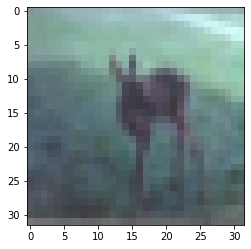

In [5]:
plt.imshow(transforms.ToPILImage()(dataset_test[555][0]));

In [6]:
class Encoder(nn.Module):
  #32*32 -> hidden -> hidden_out
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    #TODO try to use other layers
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.do = nn.Dropout(0.1)
    self.activ = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, out_dim)

  def forward(self, x):
    x = self.linear1(x)
    x = self.activ(x)
    x = self.do(x)
    x = self.linear2(x)

    return x

class Decoder(nn.Module):
  #hidden_out-> hidden -> 32*32
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    #TODO try to use other layers
    self.linear1 = nn.Linear(out_dim, hidden_dim)
    self.do = nn.Dropout(0.1)
    self.activ = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, input_dim)

  def forward(self, x):
    x = self.linear1(x)
    x = self.activ(x)
    x = self.do(x)
    x = self.linear2(x)

    return x

class LinearAutoEncoder(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    self.encoder = Encoder(input_dim, hidden_dim, out_dim)
    self.decoder = Decoder(input_dim, hidden_dim, out_dim)

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [ ]:
model = LinearAutoEncoder(inp_dim, hidden, out_dim).to(device)
optim = torch.optim.Adam(model.parameters())
#loss_func = nn.MSELoss() #TODO try to use MAE
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.47551488876342773
epoch: 0, step: 200, loss: 0.12660562992095947


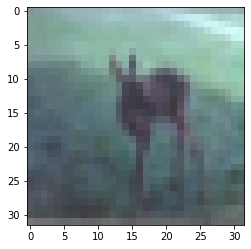

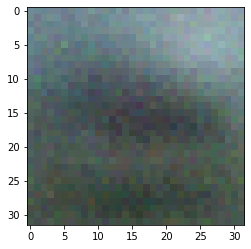

epoch: 1, step: 0, loss: 0.12244915962219238
epoch: 1, step: 200, loss: 0.10862116515636444


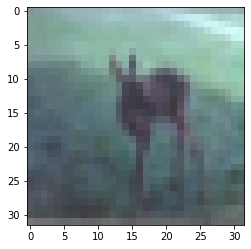

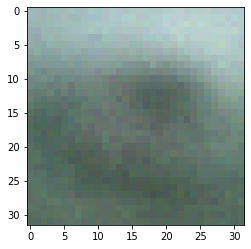

epoch: 2, step: 0, loss: 0.10758446156978607
epoch: 2, step: 200, loss: 0.10613846033811569


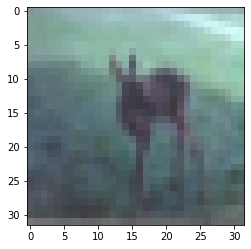

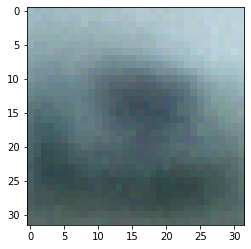

epoch: 3, step: 0, loss: 0.10134868323802948
epoch: 3, step: 200, loss: 0.10531886667013168


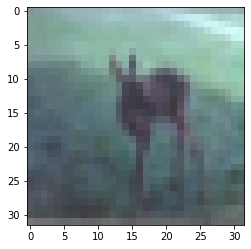

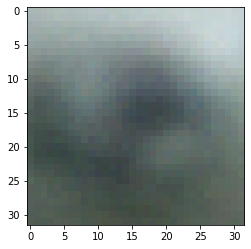

epoch: 4, step: 0, loss: 0.0965673178434372
epoch: 4, step: 200, loss: 0.10404520481824875


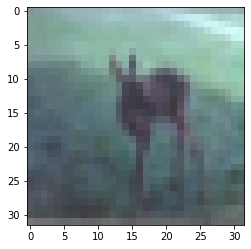

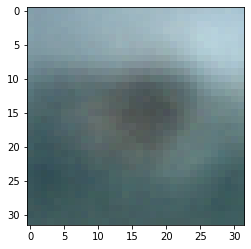

epoch: 5, step: 0, loss: 0.10079195350408554
epoch: 5, step: 200, loss: 0.09735365957021713


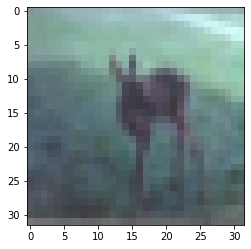

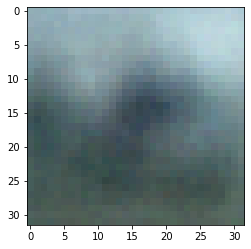

epoch: 6, step: 0, loss: 0.10197830200195312
epoch: 6, step: 200, loss: 0.10253380984067917


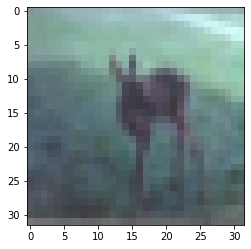

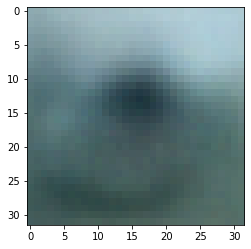

epoch: 7, step: 0, loss: 0.09519504755735397
epoch: 7, step: 200, loss: 0.0973140224814415


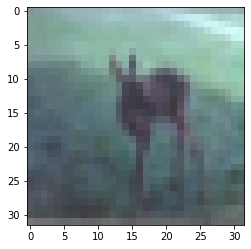

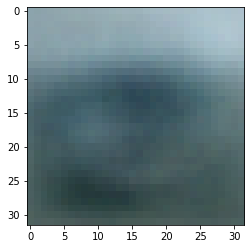

epoch: 8, step: 0, loss: 0.09665348380804062
epoch: 8, step: 200, loss: 0.1012006625533104


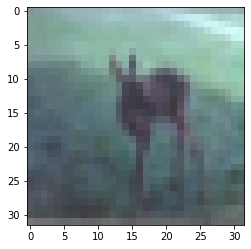

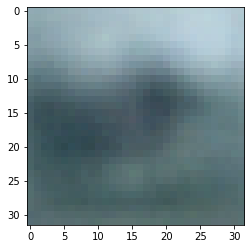

epoch: 9, step: 0, loss: 0.09921537339687347
epoch: 9, step: 200, loss: 0.09317643940448761


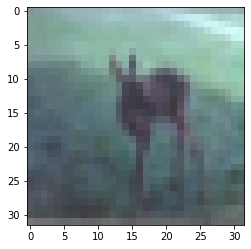

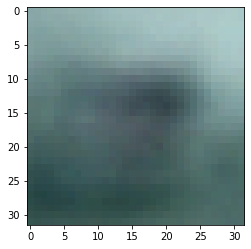

In [ ]:
# hidden_out = 40
for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model(inputs.view(inputs.size(0), -1).to(device))
        loss = loss_func(inputs.view(inputs.size(0), -1).to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    #item = dataset_test.data[555].unsqueeze(0).view(1, -1).to(device).float()
    #plt.imshow(dataset_test.data[555].detach().numpy())
    item = dataset_test[555][0].to(device).float().reshape(1, -1).to(device).float()
    plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))

    plt.show()
    plt.imshow(transforms.ToPILImage()(model(item).view((3, 32, 32)).cpu().detach()))
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')


In [7]:
input_channels = 3
hidden_channels = 300

In [ ]:
class ConvEncoder(nn.Module):
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) 
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.pool1 = nn.MaxPool2d(2, 2) # 16x16
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool2 = nn.MaxPool2d(2, 2) # 8x8
    self.conv3 = nn.ConvTranspose2d(hidden_ch*3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.activ3 = nn.ReLU()
    self.norm = nn.BatchNorm2d(hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    

  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.activ3(x)
    x = self.norm(x)
    x = self.do3(x)
    x = self.conv4(x)

    return x

class ConvDecoder(nn.Module):

  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingNearest2d(scale_factor=2) # 16x16
    self.conv2 = nn.ConvTranspose2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 32x32
    self.conv3 = nn.Conv2d(hidden_ch*3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ3 = nn.ReLU()
    self.norm = nn.BatchNorm2d(hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2) # 32x32



  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.upsample1(x)
    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool(x)
    x = self.upsample2(x)
    x = self.conv3(x)
    x = self.activ3(x)
    x = self.norm(x)
    x = self.do3(x)
    x = self.conv4(x)

    return x

class ConvAutoEncoder(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvEncoder(input_ch, hidden_ch, )
    self.decoder = ConvDecoder(input_ch, hidden_ch, )

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [ ]:
model = ConvAutoEncoder(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.MSELoss() #TODO try to use MAE
#loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5356704592704773
epoch: 0, step: 200, loss: 0.026301098987460136


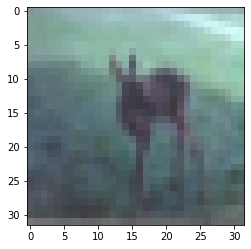

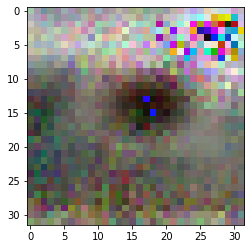

epoch: 1, step: 0, loss: 0.019650906324386597
epoch: 1, step: 200, loss: 0.01539464108645916


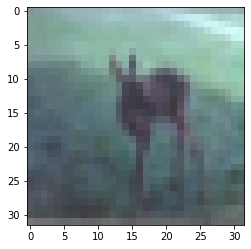

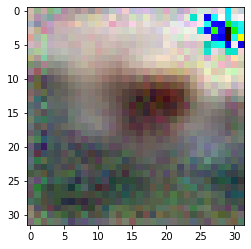

epoch: 2, step: 0, loss: 0.011145866475999355
epoch: 2, step: 200, loss: 0.009438008069992065


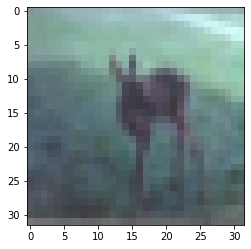

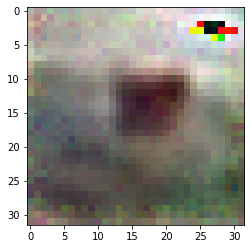

epoch: 3, step: 0, loss: 0.007380315568298101
epoch: 3, step: 200, loss: 0.00716945668682456


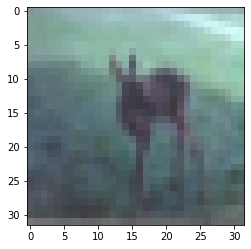

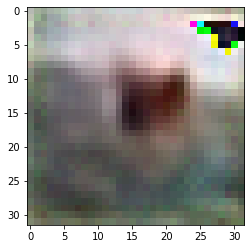

epoch: 4, step: 0, loss: 0.006689091678708792
epoch: 4, step: 200, loss: 0.006866841576993465


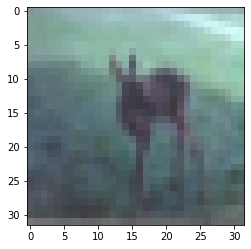

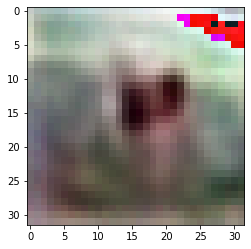

epoch: 5, step: 0, loss: 0.007111204322427511
epoch: 5, step: 200, loss: 0.005780134350061417


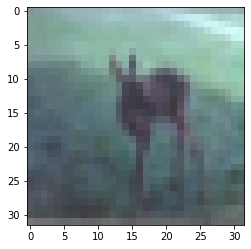

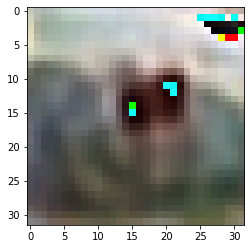

epoch: 6, step: 0, loss: 0.005259882193058729
epoch: 6, step: 200, loss: 0.006220388226211071


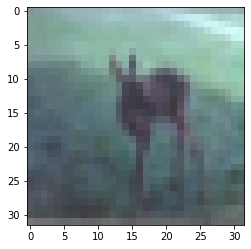

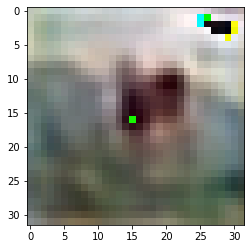

epoch: 7, step: 0, loss: 0.0061521977186203
epoch: 7, step: 200, loss: 0.00554282870143652


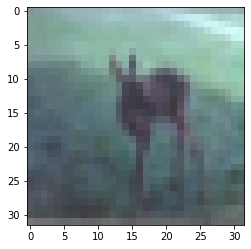

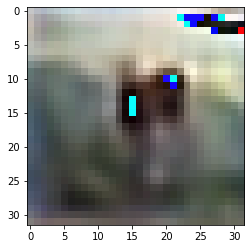

epoch: 8, step: 0, loss: 0.005111923441290855
epoch: 8, step: 200, loss: 0.005338896997272968


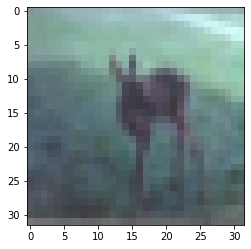

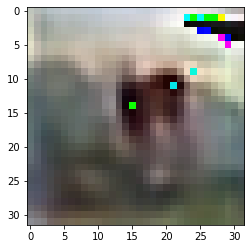

epoch: 9, step: 0, loss: 0.004852269310504198
epoch: 9, step: 200, loss: 0.005106755997985601


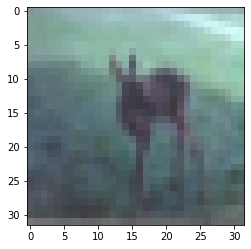

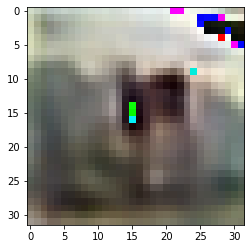

In [ ]:
for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test[555][0].to(device).float()
    plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
    plt.show()
    plt.imshow(transforms.ToPILImage()(model(item.unsqueeze(0)).squeeze().cpu().detach()))
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

In [ ]:
hidden_channels = 128

In [ ]:
class ConvEncoder2(nn.Module):
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) 
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.pool1 = nn.MaxPool2d(2, 2) # 16x16
    self.norm = nn.BatchNorm2d(hidden_ch)
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool2 = nn.MaxPool2d(2, 2) # 8x8
    self.norm2 = nn.BatchNorm2d(hidden_ch*3)
    self.conv3 = nn.ConvTranspose2d(hidden_ch*3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.activ3 = nn.ReLU()
    self.norm3 = nn.BatchNorm2d(hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    

  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.pool1(x)
    #x = self.norm(x)
    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool2(x)
    #x = self.norm2(x)
    x = self.conv3(x)
    x = self.activ3(x)
    x = self.norm3(x)
    x = self.do3(x)
    x = self.conv4(x)

    return x

class ConvDecoder2(nn.Module):

  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingNearest2d(scale_factor=2) # 16x16
    self.norm = nn.BatchNorm2d(hidden_ch)
    self.conv2 = nn.ConvTranspose2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 32x32
    self.norm2 = nn.BatchNorm2d(hidden_ch*3)
    self.conv3 = nn.Conv2d(hidden_ch*3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ3 = nn.ReLU()
    self.norm3 = nn.BatchNorm2d(hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2) # 32x32



  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.upsample1(x)
    #x = self.norm(x)
    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool(x)
    x = self.upsample2(x)
    #x = self.norm2(x)
    x = self.conv3(x)
    x = self.activ3(x)
    x = self.norm3(x)
    x = self.do3(x)
    x = self.conv4(x)

    return x

class ConvAutoEncoder2(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvEncoder2(input_ch, hidden_ch, )
    self.decoder = ConvDecoder2(input_ch, hidden_ch, )

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [ ]:
model2 = ConvAutoEncoder2(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model2.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5727784037590027
epoch: 0, step: 200, loss: 0.09238936007022858


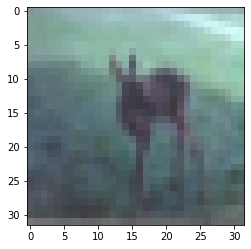

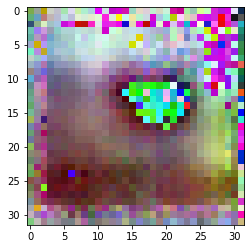

epoch: 1, step: 0, loss: 0.09207844734191895
epoch: 1, step: 200, loss: 0.08102309703826904


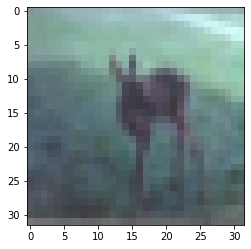

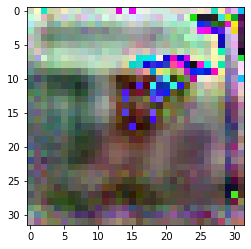

epoch: 2, step: 0, loss: 0.06986835598945618
epoch: 2, step: 200, loss: 0.06949575245380402


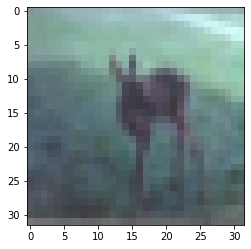

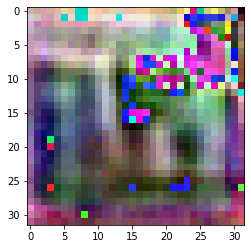

epoch: 3, step: 0, loss: 0.06814911961555481
epoch: 3, step: 200, loss: 0.061009060591459274


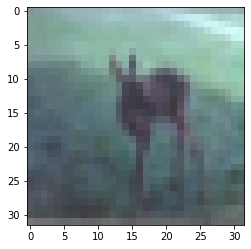

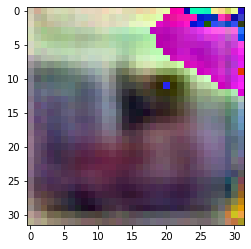

epoch: 4, step: 0, loss: 0.08142831921577454
epoch: 4, step: 200, loss: 0.05899447947740555


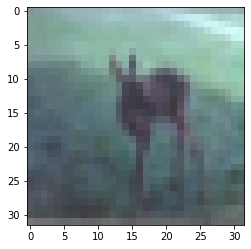

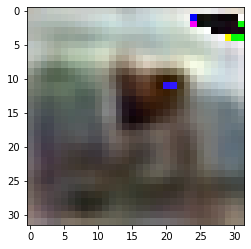

epoch: 5, step: 0, loss: 0.06303299963474274
epoch: 5, step: 200, loss: 0.0553523451089859


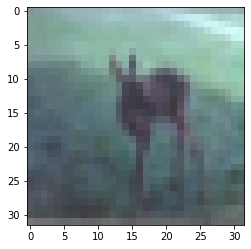

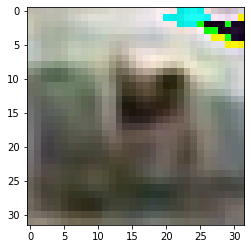

epoch: 6, step: 0, loss: 0.05420975387096405
epoch: 6, step: 200, loss: 0.05414562672376633


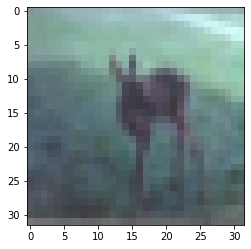

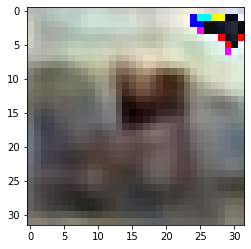

epoch: 7, step: 0, loss: 0.05606252700090408
epoch: 7, step: 200, loss: 0.054166100919246674


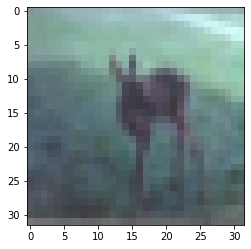

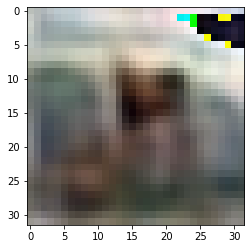

epoch: 8, step: 0, loss: 0.05477457493543625
epoch: 8, step: 200, loss: 0.05771332234144211


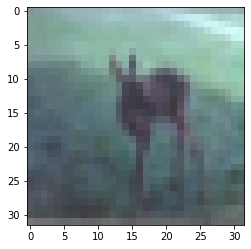

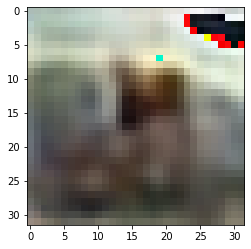

epoch: 9, step: 0, loss: 0.05425914376974106
epoch: 9, step: 200, loss: 0.05713817477226257


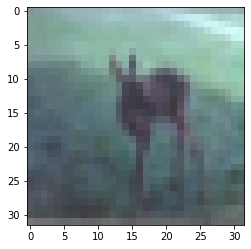

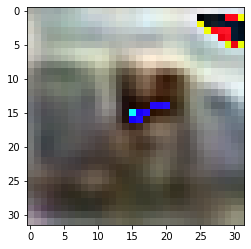

In [ ]:
for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model2(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test[555][0].to(device).float()
    plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
    plt.show()
    plt.imshow(transforms.ToPILImage()(model2(item.unsqueeze(0)).squeeze().cpu().detach()))
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

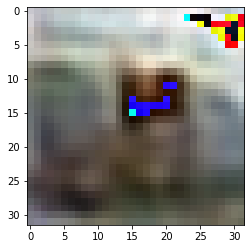

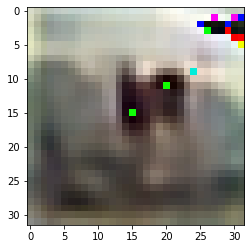

In [ ]:
plt.imshow(transforms.ToPILImage()(model2(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()
plt.imshow(transforms.ToPILImage()(model(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()

In [ ]:
class ConvEncoder3(nn.Module):
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) 
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.pool1 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5)) # 16x16
    
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool2 = nn.MaxPool2d(2, 2) # 8x8


    self.conv3 = nn.ConvTranspose2d(hidden_ch*3, hidden_ch*2, kernel_size=3, stride=1, 
                           padding=1)
    self.activ3 = nn.ReLU()
    self.do3 = nn.Dropout(0.1)

    self.conv4 = nn.ConvTranspose2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.activ4 = nn.ReLU()
    self.norm = nn.BatchNorm2d(hidden_ch)
    
    self.conv5 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    

  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool2(x)

    x = self.conv3(x)
    x = self.activ3(x)
    x = self.do3(x)

    x = self.conv4(x)
    x = self.activ4(x)
    x = self.norm(x)

    x = self.conv5(x)

    return x

class ConvDecoder3(nn.Module):

  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2) # 16x16
    
    self.conv2 = nn.ConvTranspose2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 32x32

    self.conv3 = nn.Conv2d(hidden_ch*3, hidden_ch*2, kernel_size=3, stride=1, 
                           padding=1)
    self.activ3 = nn.ReLU()
    self.do3 = nn.Dropout(0.1)

    self.conv4 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.activ4 = nn.ReLU()
    self.do4 = nn.Dropout(0.1)


    self.norm = nn.BatchNorm2d(hidden_ch)
    self.conv5 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2) # 32x32



  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.upsample1(x)

    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.upsample2(x)

    x = self.conv3(x)
    x = self.activ3(x)
    x = self.do3(x)

    x = self.conv4(x)
    x = self.activ4(x)
    x = self.do4(x)
    x = self.norm(x)

    x = self.conv5(x)

    return x

class ConvAutoEncoder3(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvEncoder3(input_ch, hidden_ch, )
    self.decoder = ConvDecoder3(input_ch, hidden_ch, )

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [ ]:
out_dim = 128
n_epochs = 20

In [ ]:
model3 = ConvAutoEncoder3(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model3.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.0567508265376091
epoch: 0, step: 200, loss: 0.051317449659109116


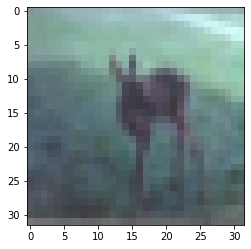

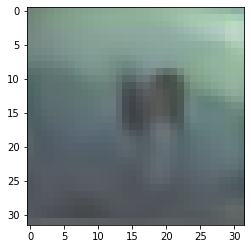

epoch: 1, step: 0, loss: 0.05495470017194748
epoch: 1, step: 200, loss: 0.05396775156259537


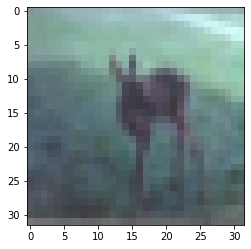

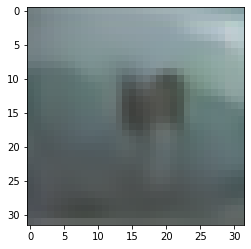

epoch: 2, step: 0, loss: 0.050764333456754684
epoch: 2, step: 200, loss: 0.05781986564397812


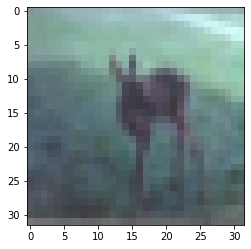

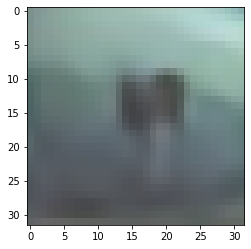

epoch: 3, step: 0, loss: 0.05332666635513306
epoch: 3, step: 200, loss: 0.052507661283016205


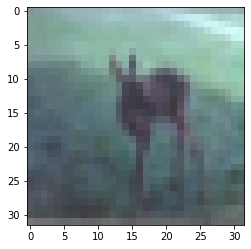

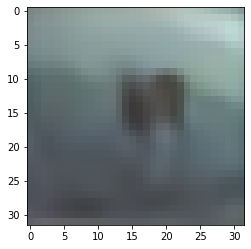

epoch: 4, step: 0, loss: 0.052318595349788666
epoch: 4, step: 200, loss: 0.04810137674212456


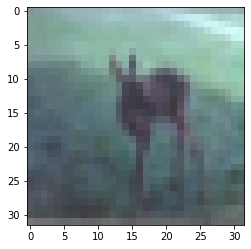

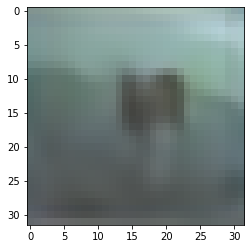

epoch: 5, step: 0, loss: 0.05451926589012146
epoch: 5, step: 200, loss: 0.05153395235538483


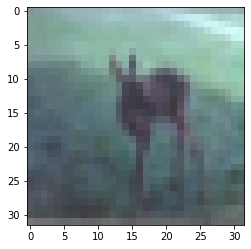

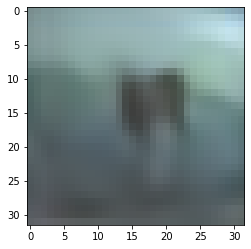

epoch: 6, step: 0, loss: 0.0525849312543869
epoch: 6, step: 200, loss: 0.04993073269724846


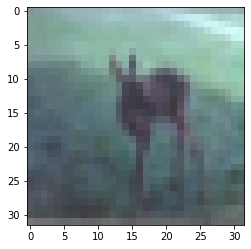

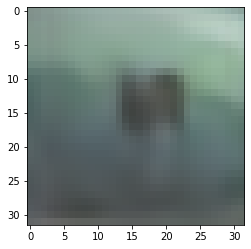

epoch: 7, step: 0, loss: 0.052002258598804474
epoch: 7, step: 200, loss: 0.04743659496307373


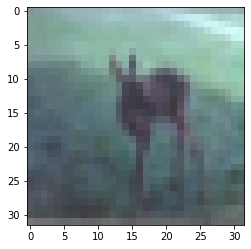

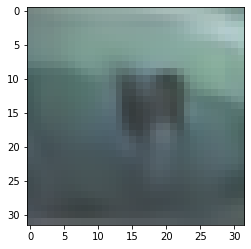

epoch: 8, step: 0, loss: 0.049773719161748886
epoch: 8, step: 200, loss: 0.051454778760671616


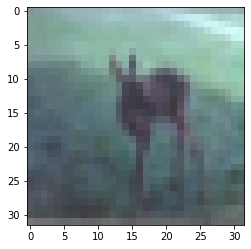

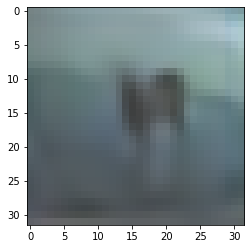

epoch: 9, step: 0, loss: 0.05416414886713028
epoch: 9, step: 200, loss: 0.049442898482084274


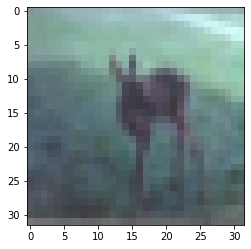

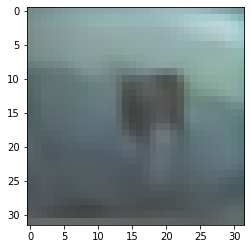

In [ ]:
for epoch in range(n_epochs):
    model3.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model3(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    model3.train(False)
    item = dataset_test[555][0].to(device).float()
    plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
    plt.show()
    plt.imshow(transforms.ToPILImage()(model3(item.unsqueeze(0)).squeeze().cpu().detach()))
    plt.show()

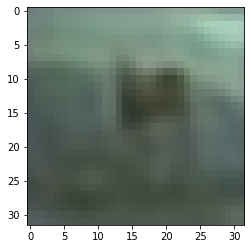

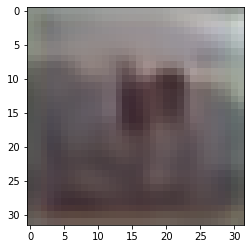

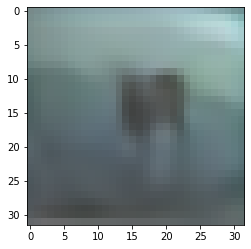

In [ ]:
model2.train(False)
plt.imshow(transforms.ToPILImage()(model2(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()
model.train(False)
plt.imshow(transforms.ToPILImage()(model(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()
model3.train(False)
plt.imshow(transforms.ToPILImage()(model3(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()

Разные варианты модели не дают приемлемого результата, но учатся уже достаточно продолжительное время. Было принято решение вместо усложнения архитектуры попробовать увеличение числа эпох.

In [8]:
class ConvEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                               padding=2)
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.pool1 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 8x8

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)

        self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1,
                               padding=1)  # 8x8

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.conv4(x)

        return x


class ConvDecoder4(nn.Module):

    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch*2, kernel_size=3, stride=1,
                               padding=1)  # 8x8
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x


class ConvAutoEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvEncoder4(input_ch, hidden_ch, )
        self.decoder = ConvDecoder4(input_ch, hidden_ch, )

    def forward(self, x):
        hidden = self.encoder(x)
        x_ = self.decoder(hidden)

        return x_


In [12]:
hidden_ch = 100
n_epochs = 30
model4 = ConvAutoEncoder4(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model4.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5406553149223328
epoch: 0, step: 200, loss: 0.09697258472442627


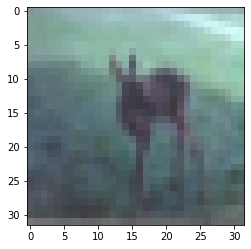

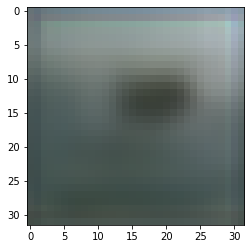

epoch: 1, step: 0, loss: 0.07863079011440277
epoch: 1, step: 200, loss: 0.07265110313892365


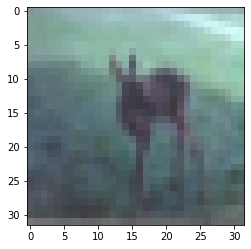

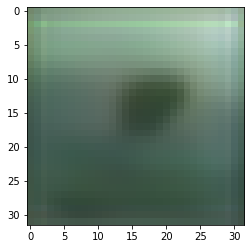

epoch: 2, step: 0, loss: 0.0732603445649147
epoch: 2, step: 200, loss: 0.06502550095319748


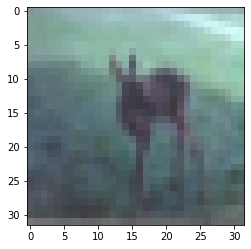

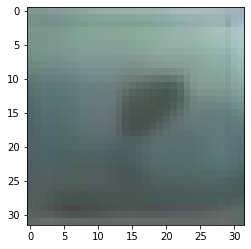

epoch: 3, step: 0, loss: 0.06513728201389313
epoch: 3, step: 200, loss: 0.06493550539016724


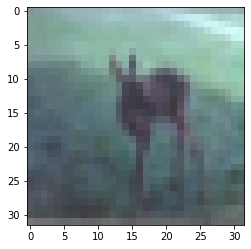

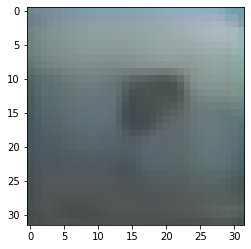

epoch: 4, step: 0, loss: 0.06405415385961533
epoch: 4, step: 200, loss: 0.06244325265288353


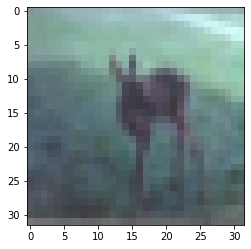

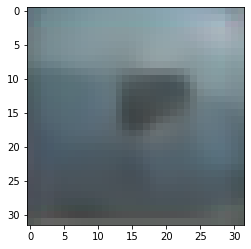

epoch: 5, step: 0, loss: 0.058271557092666626
epoch: 5, step: 200, loss: 0.05874050781130791


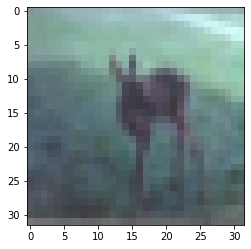

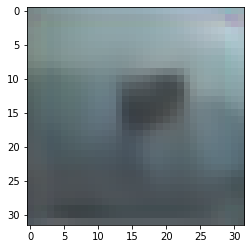

epoch: 6, step: 0, loss: 0.0608687624335289
epoch: 6, step: 200, loss: 0.061349280178546906


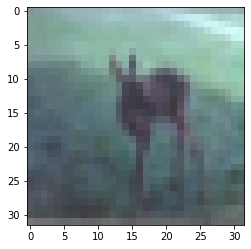

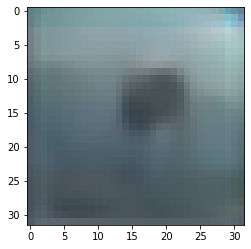

epoch: 7, step: 0, loss: 0.05988166853785515
epoch: 7, step: 200, loss: 0.058970727026462555


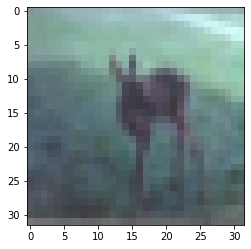

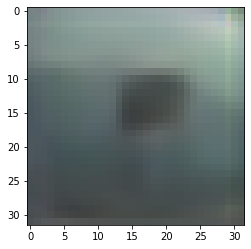

epoch: 8, step: 0, loss: 0.05955241248011589
epoch: 8, step: 200, loss: 0.06204712390899658


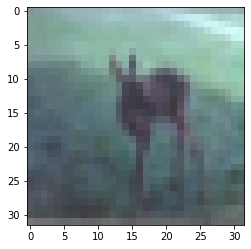

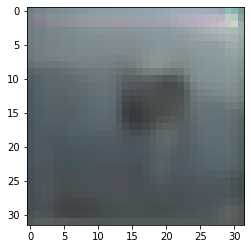

epoch: 9, step: 0, loss: 0.057675063610076904
epoch: 9, step: 200, loss: 0.06038828194141388


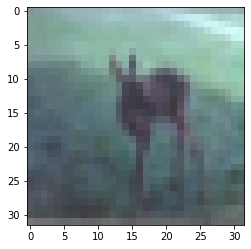

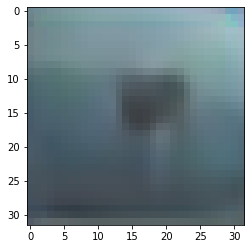

epoch: 10, step: 0, loss: 0.06111717224121094
epoch: 10, step: 200, loss: 0.057724498212337494


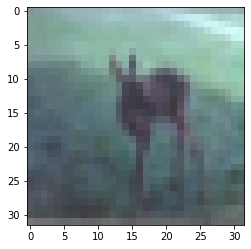

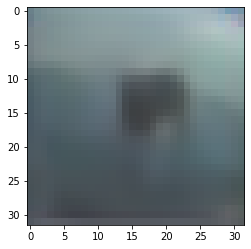

epoch: 11, step: 0, loss: 0.057344429194927216
epoch: 11, step: 200, loss: 0.05943263694643974


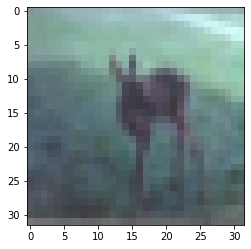

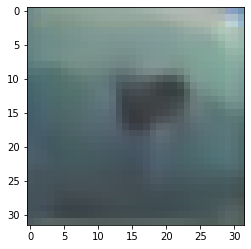

epoch: 12, step: 0, loss: 0.06114530563354492
epoch: 12, step: 200, loss: 0.05995839834213257


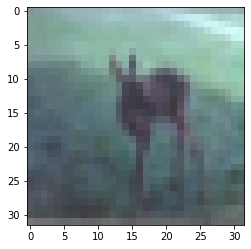

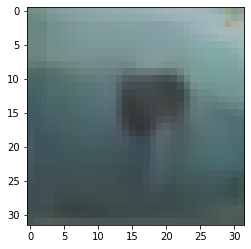

epoch: 13, step: 0, loss: 0.05933095142245293
epoch: 13, step: 200, loss: 0.05464810132980347


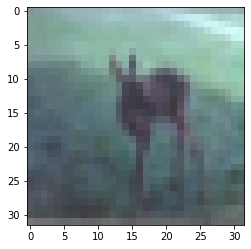

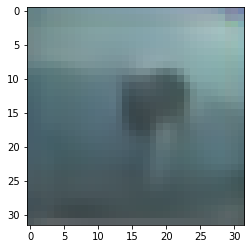

epoch: 14, step: 0, loss: 0.05630999058485031
epoch: 14, step: 200, loss: 0.05509486794471741


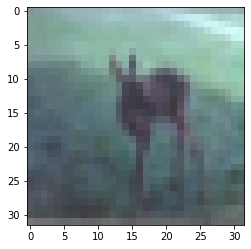

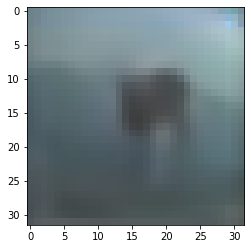

epoch: 15, step: 0, loss: 0.05545398220419884
epoch: 15, step: 200, loss: 0.05736955255270004


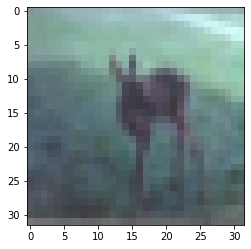

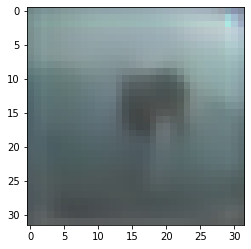

epoch: 16, step: 0, loss: 0.054991886019706726
epoch: 16, step: 200, loss: 0.05566474050283432


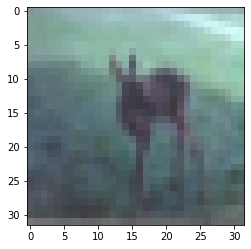

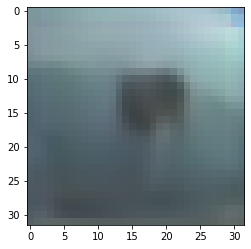

epoch: 17, step: 0, loss: 0.05577922612428665
epoch: 17, step: 200, loss: 0.0535413920879364


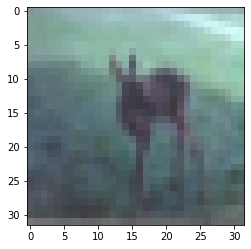

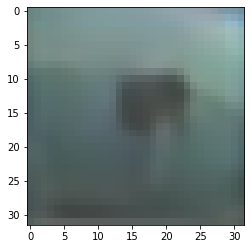

epoch: 18, step: 0, loss: 0.05329550430178642
epoch: 18, step: 200, loss: 0.05233322083950043


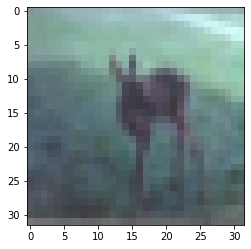

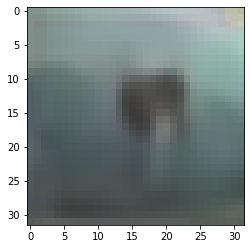

epoch: 19, step: 0, loss: 0.05329066514968872
epoch: 19, step: 200, loss: 0.054479263722896576


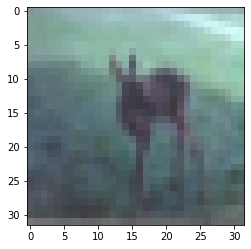

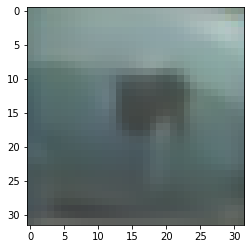

epoch: 20, step: 0, loss: 0.05281262844800949
epoch: 20, step: 200, loss: 0.05402931571006775


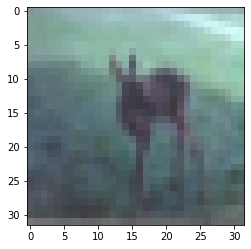

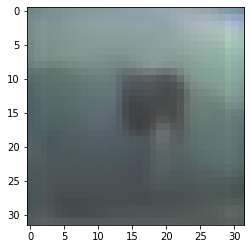

epoch: 21, step: 0, loss: 0.05410843715071678
epoch: 21, step: 200, loss: 0.053843848407268524


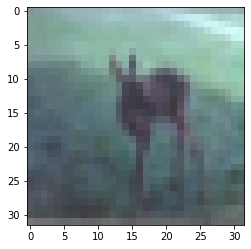

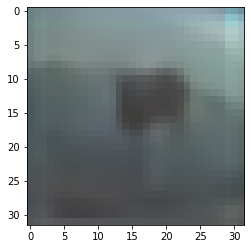

epoch: 22, step: 0, loss: 0.055292826145887375
epoch: 22, step: 200, loss: 0.05351018160581589


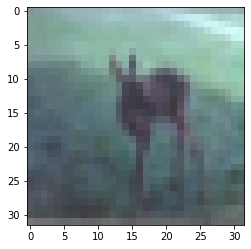

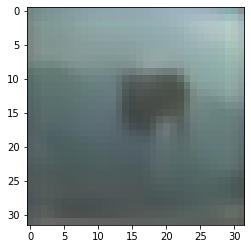

epoch: 23, step: 0, loss: 0.055216025561094284
epoch: 23, step: 200, loss: 0.05286785587668419


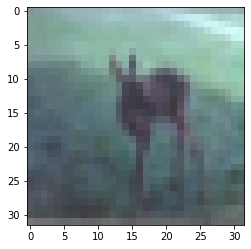

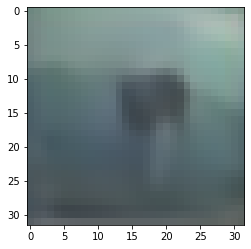

epoch: 24, step: 0, loss: 0.04842063784599304
epoch: 24, step: 200, loss: 0.05234526842832565


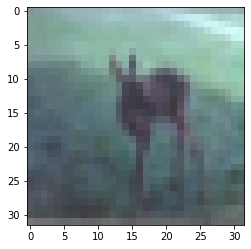

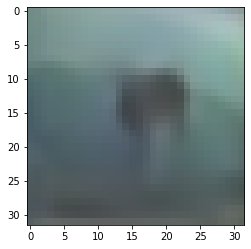

epoch: 25, step: 0, loss: 0.055354826152324677
epoch: 25, step: 200, loss: 0.05584585666656494


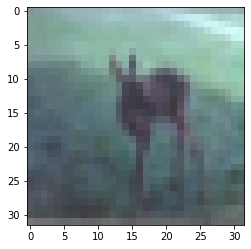

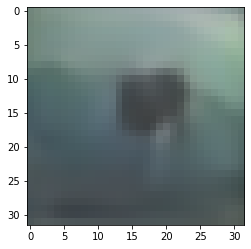

epoch: 26, step: 0, loss: 0.0545293353497982
epoch: 26, step: 200, loss: 0.05507960170507431


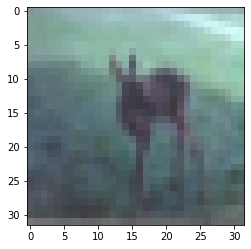

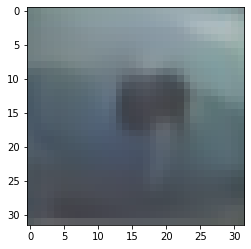

epoch: 27, step: 0, loss: 0.053029291331768036
epoch: 27, step: 200, loss: 0.055012695491313934


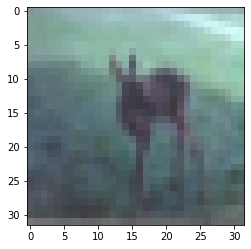

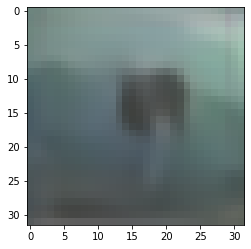

epoch: 28, step: 0, loss: 0.05012228339910507
epoch: 28, step: 200, loss: 0.05103083699941635


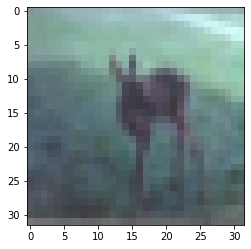

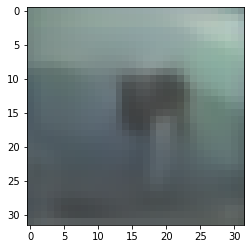

epoch: 29, step: 0, loss: 0.05141932889819145
epoch: 29, step: 200, loss: 0.05456774681806564


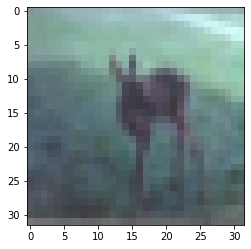

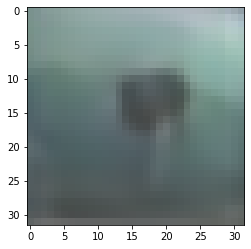

In [13]:
for epoch in range(n_epochs):
    model4.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model4(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model4.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model4.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

**Вывод:** увеличение числа эпох не дает какого-либо заметного улучшения. После 13-й эпохи loss перестает падать.
Пробую сжимать картинку не так сильно, применив только один MaxPooling. Количество эпох определим 13

In [30]:
class ConvEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                               padding=2)
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 8x8

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)

        self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1,
                               padding=1)  # 16x16

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.conv4(x)

        return x


class ConvDecoder4(nn.Module):

    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 32x32

        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*2, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x


class ConvAutoEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvEncoder4(input_ch, hidden_ch, )
        self.decoder = ConvDecoder4(input_ch, hidden_ch, )

    def forward(self, x):
        hidden = self.encoder(x)
        x_ = self.decoder(hidden)

        return x_


In [31]:
hidden_ch = 100
n_epochs = 13
model4 = ConvAutoEncoder4(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model4.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5541133880615234
epoch: 0, step: 200, loss: 0.06536959111690521


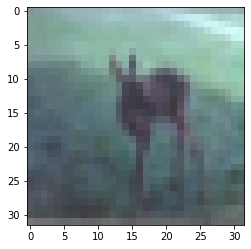

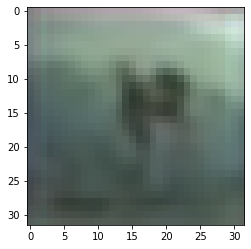

epoch: 1, step: 0, loss: 0.051616452634334564
epoch: 1, step: 200, loss: 0.04933668673038483


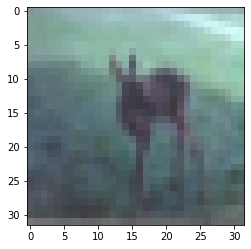

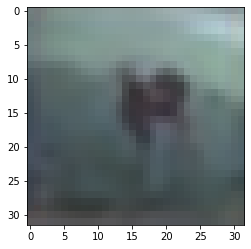

epoch: 2, step: 0, loss: 0.047411929816007614
epoch: 2, step: 200, loss: 0.04317014664411545


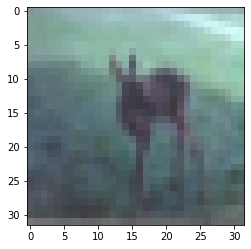

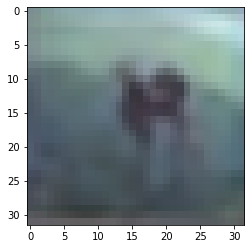

epoch: 3, step: 0, loss: 0.04402932524681091
epoch: 3, step: 200, loss: 0.04407737776637077


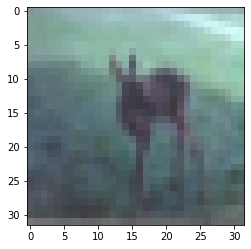

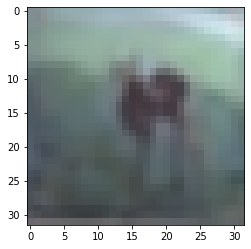

epoch: 4, step: 0, loss: 0.03731384500861168
epoch: 4, step: 200, loss: 0.036345988512039185


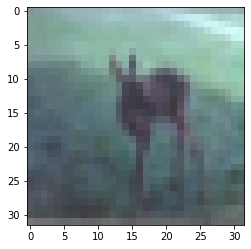

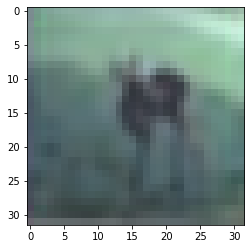

epoch: 5, step: 0, loss: 0.0383281372487545
epoch: 5, step: 200, loss: 0.036263175308704376


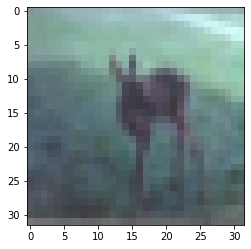

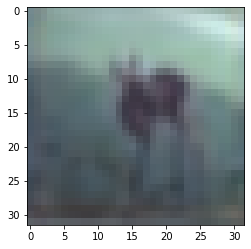

epoch: 6, step: 0, loss: 0.038370344787836075
epoch: 6, step: 200, loss: 0.030977359041571617


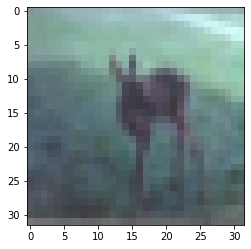

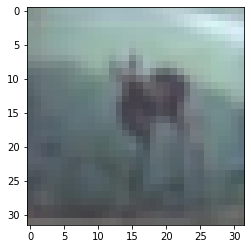

epoch: 7, step: 0, loss: 0.031984277069568634
epoch: 7, step: 200, loss: 0.03476817533373833


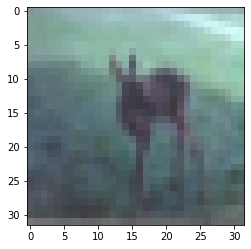

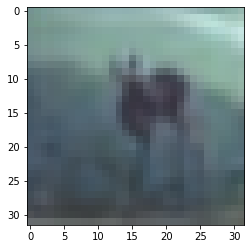

epoch: 8, step: 0, loss: 0.03423939272761345
epoch: 8, step: 200, loss: 0.03198251500725746


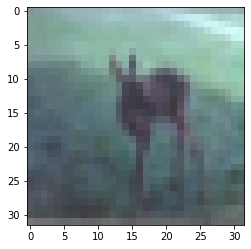

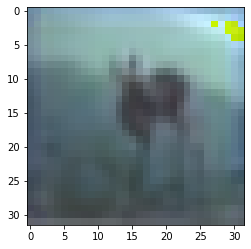

epoch: 9, step: 0, loss: 0.03582741320133209
epoch: 9, step: 200, loss: 0.03261132165789604


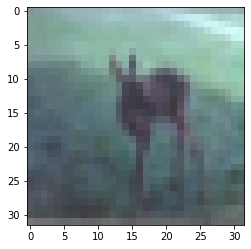

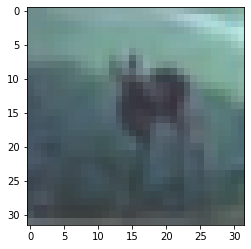

epoch: 10, step: 0, loss: 0.03204378858208656
epoch: 10, step: 200, loss: 0.029212795197963715


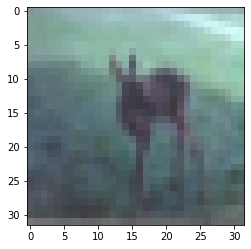

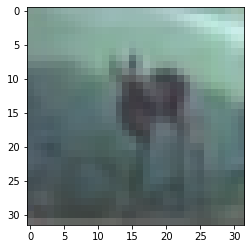

epoch: 11, step: 0, loss: 0.031919173896312714
epoch: 11, step: 200, loss: 0.03468277305364609


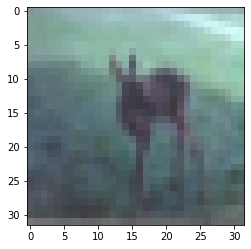

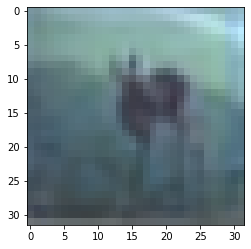

epoch: 12, step: 0, loss: 0.03457071632146835
epoch: 12, step: 200, loss: 0.032456085085868835


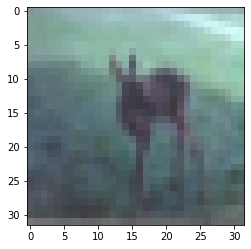

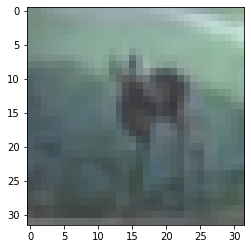

In [32]:
for epoch in range(n_epochs):
    model4.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model4(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model4.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model4.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

**Вывод:** результат получился отличным. Модель с 2-ым сжатием справляется хорошо. Учитывая, что сжимается сигнал с 3-х каналов, а не с одного, как с ч/б картинкой, сжатие в 2 раза столь маленькой картинки считаю достойным результатом. Визуально приемлемый результат уже можно получить на 10-й эпохе

Примеры других картинок из датасета

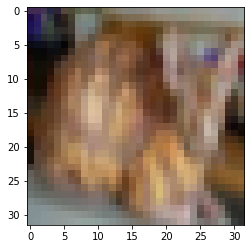

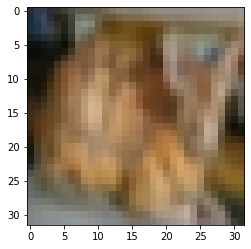

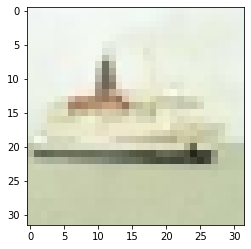

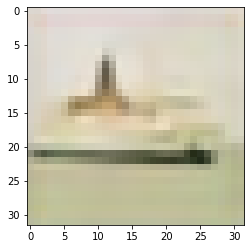

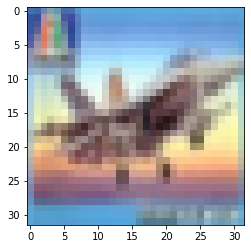

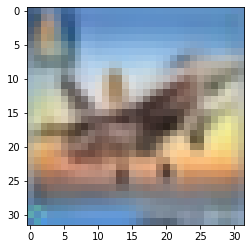

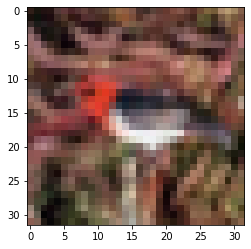

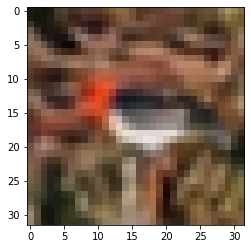

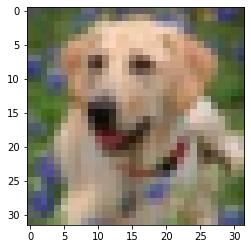

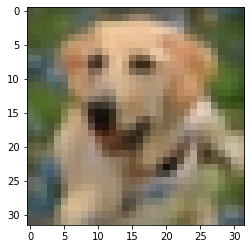

In [39]:
with torch.no_grad():
    model4.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

*Для сравнения попробуем MSELoss на этой же архитектуре. 10 эпох*

In [40]:
class ConvEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                               padding=2)
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 8x8

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        #self.norm = nn.BatchNorm2d(hidden_ch)

        self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1,
                               padding=1)  # 16x16

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.conv4(x)

        return x


class ConvDecoder4(nn.Module):

    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 32x32

        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*2, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x


class ConvAutoEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvEncoder4(input_ch, hidden_ch, )
        self.decoder = ConvDecoder4(input_ch, hidden_ch, )

    def forward(self, x):
        hidden = self.encoder(x)
        x_ = self.decoder(hidden)

        return x_


In [41]:
hidden_ch = 100
n_epochs = 10
model4 = ConvAutoEncoder4(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model4.parameters())
#loss_func = nn.L1Loss()
loss_func = nn.MSELoss()

epoch: 0, step: 0, loss: 0.4761224389076233
epoch: 0, step: 200, loss: 0.015266608446836472


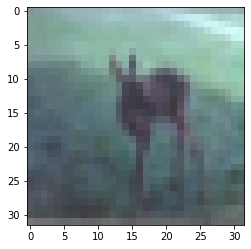

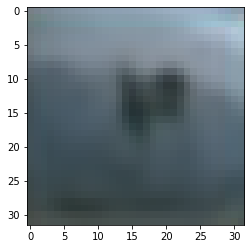

epoch: 1, step: 0, loss: 0.006845991127192974
epoch: 1, step: 200, loss: 0.006068117450922728


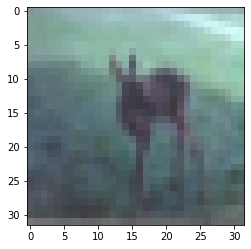

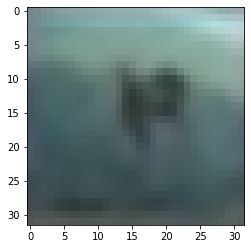

epoch: 2, step: 0, loss: 0.004514523781836033
epoch: 2, step: 200, loss: 0.003632873296737671


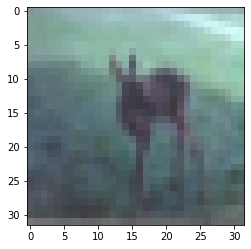

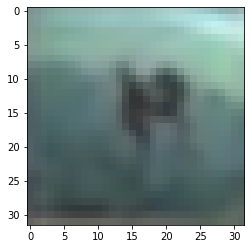

epoch: 3, step: 0, loss: 0.004142876714468002
epoch: 3, step: 200, loss: 0.0038784202188253403


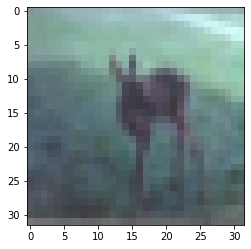

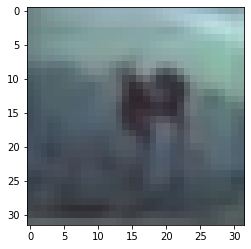

epoch: 4, step: 0, loss: 0.003486885456368327
epoch: 4, step: 200, loss: 0.0036296143662184477


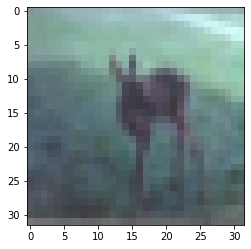

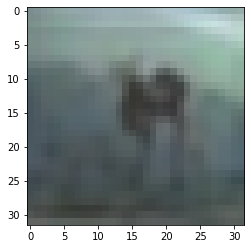

epoch: 5, step: 0, loss: 0.0027046999894082546
epoch: 5, step: 200, loss: 0.0035984423011541367


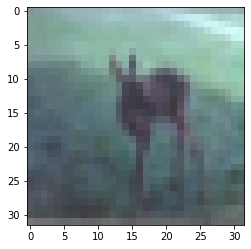

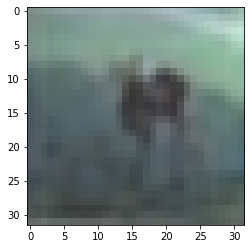

epoch: 6, step: 0, loss: 0.002615697681903839
epoch: 6, step: 200, loss: 0.0025458536110818386


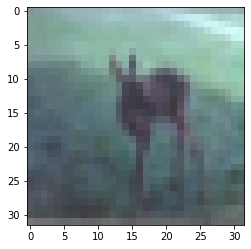

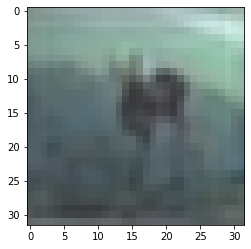

epoch: 7, step: 0, loss: 0.0022300088312476873
epoch: 7, step: 200, loss: 0.0026125411968678236


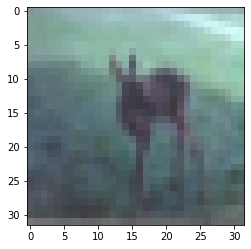

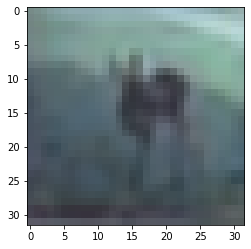

epoch: 8, step: 0, loss: 0.0021238718181848526
epoch: 8, step: 200, loss: 0.0031559362541884184


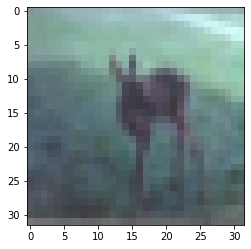

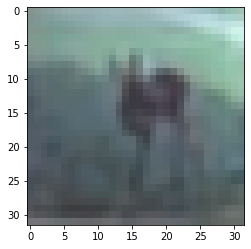

epoch: 9, step: 0, loss: 0.002235890133306384
epoch: 9, step: 200, loss: 0.002092205686494708


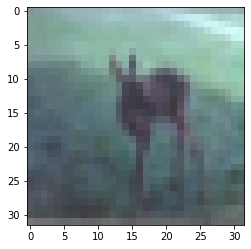

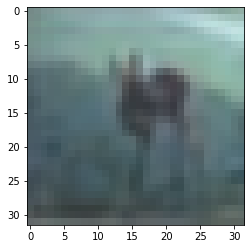

In [42]:
for epoch in range(n_epochs):
    model4.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model4(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model4.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model4.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

**Вывод:** Использование L1Loss показывает лучший результат

Примеры картинок с MSE

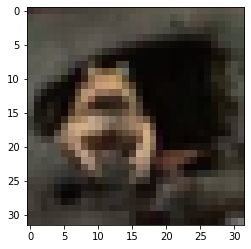

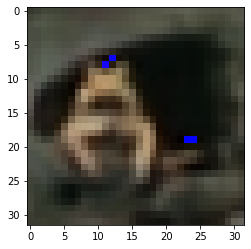

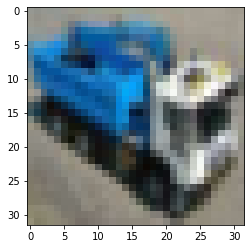

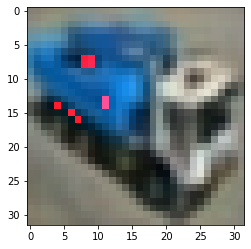

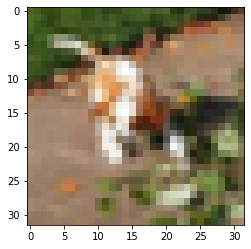

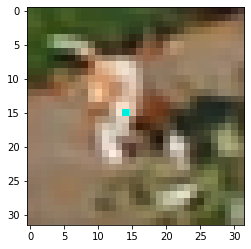

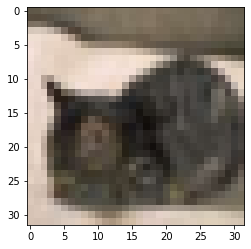

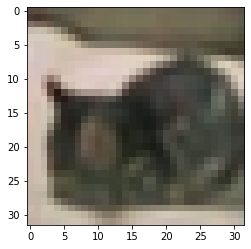

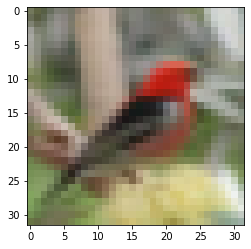

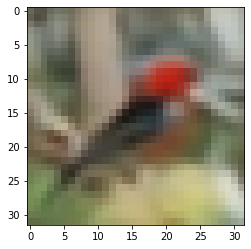

In [45]:
with torch.no_grad():
    model4.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

# Уменьшение шума

In [52]:
model_denoise = ConvAutoEncoder4(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model_denoise.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5571603775024414
epoch: 0, step: 200, loss: 0.07475350797176361


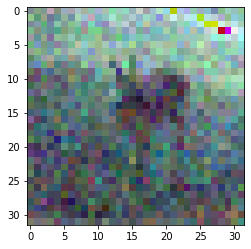

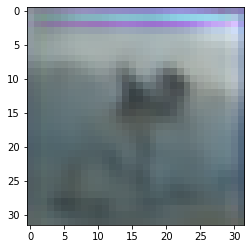

epoch: 1, step: 0, loss: 0.061756886541843414
epoch: 1, step: 200, loss: 0.0515655092895031


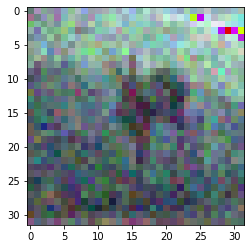

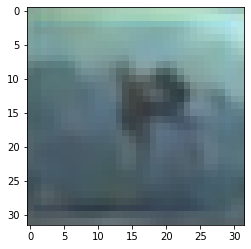

epoch: 2, step: 0, loss: 0.04951302707195282
epoch: 2, step: 200, loss: 0.04513783007860184


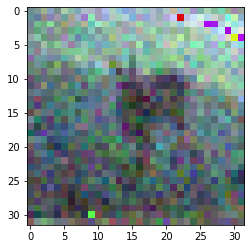

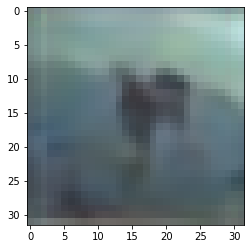

epoch: 3, step: 0, loss: 0.04471465200185776
epoch: 3, step: 200, loss: 0.042498629540205


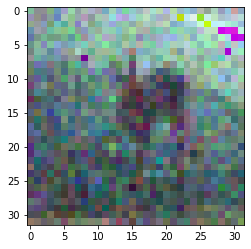

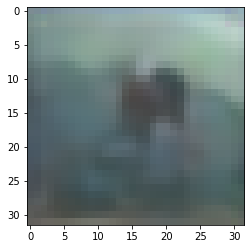

epoch: 4, step: 0, loss: 0.04166784882545471
epoch: 4, step: 200, loss: 0.04570316523313522


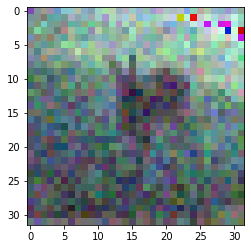

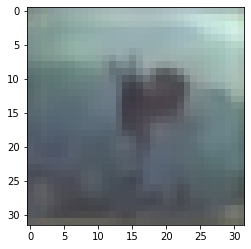

epoch: 5, step: 0, loss: 0.04259144514799118
epoch: 5, step: 200, loss: 0.04028996452689171


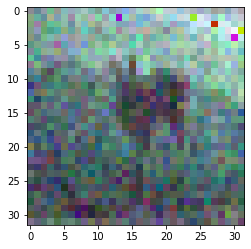

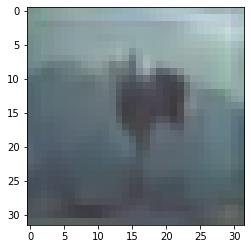

epoch: 6, step: 0, loss: 0.03891019523143768
epoch: 6, step: 200, loss: 0.03954457491636276


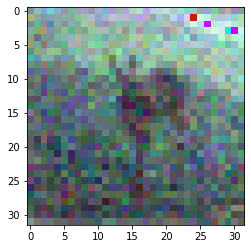

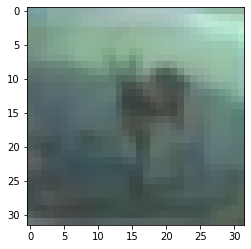

epoch: 7, step: 0, loss: 0.039465922862291336
epoch: 7, step: 200, loss: 0.04023943841457367


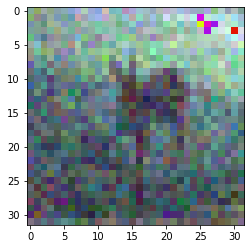

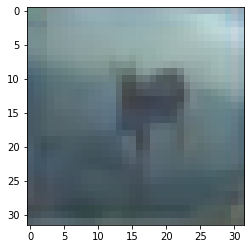

epoch: 8, step: 0, loss: 0.04096272215247154
epoch: 8, step: 200, loss: 0.038232602179050446


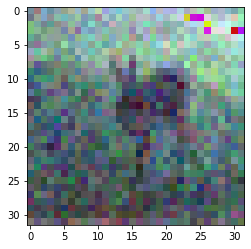

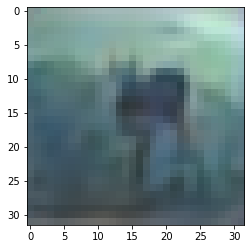

epoch: 9, step: 0, loss: 0.03712013363838196
epoch: 9, step: 200, loss: 0.0406189039349556


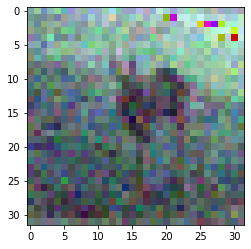

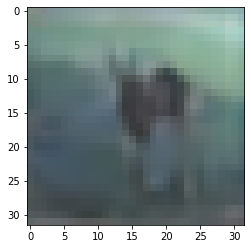

In [53]:
for epoch in range(n_epochs):
    model_denoise.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        inputs = inputs.to(device)
        noise_inputs = inputs + \
        torch.normal(torch.zeros_like(inputs), torch.ones_like(inputs)) * 0.08 
        predict = model_denoise(noise_inputs)
        loss = loss_func(inputs, predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_denoise.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model_denoise.train(False)
        item = dataset_test[555][0].to(device).float()
        item = item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.08
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model_denoise(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

Картинка на входе:


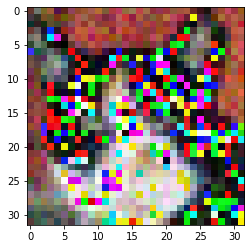

Картинка после обработки на модели:


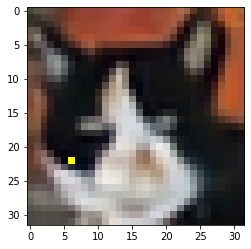

Исходная картинка:


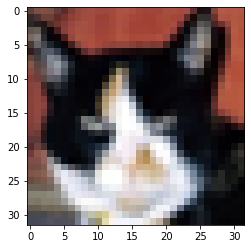

Картинка на входе:


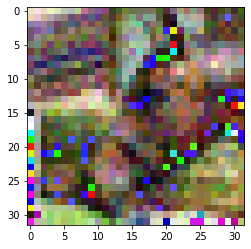

Картинка после обработки на модели:


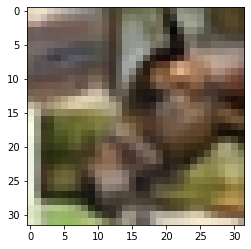

Исходная картинка:


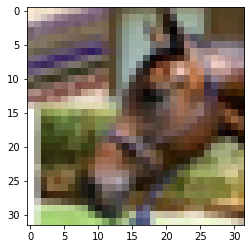

Картинка на входе:


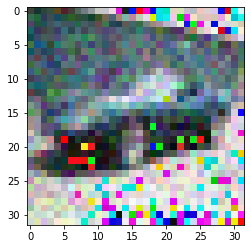

Картинка после обработки на модели:


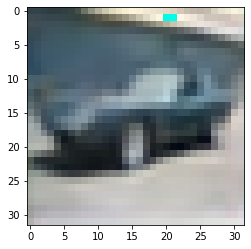

Исходная картинка:


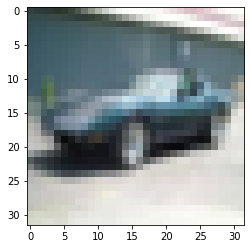

Картинка на входе:


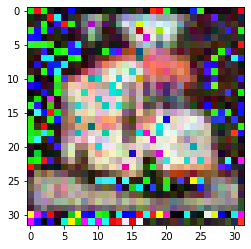

Картинка после обработки на модели:


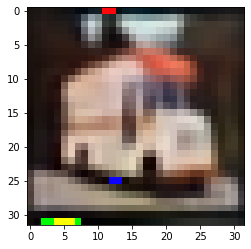

Исходная картинка:


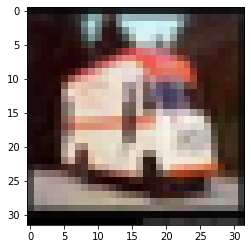

Картинка на входе:


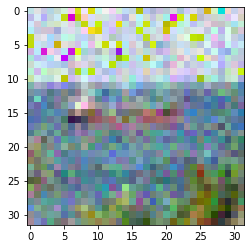

Картинка после обработки на модели:


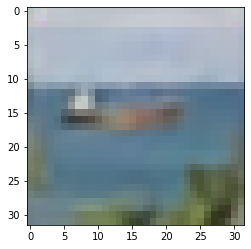

Исходная картинка:


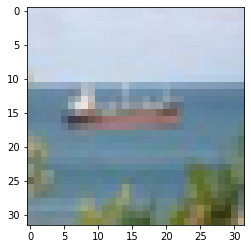

In [57]:
with torch.no_grad():
    model_denoise.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        print('Картинка на входе:')
        plt.imshow(transforms.ToPILImage()(item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.08))
        plt.show()
        print('Картинка после обработки на модели:')
        plt.imshow(transforms.ToPILImage()(model_denoise((item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.08).unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()
        print('Исходная картинка:')
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()

**Вывод:** модель справляется с задачей достойно

# VAE

Пробуем сжатие в 4-раза, ф-я потерь L1Loss, т.к. показала себя лучше

In [72]:
class ConvVAEncoder(nn.Module):
    def __init__(self, input_ch, hidden_ch):
      super().__init__()
      self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                              padding=2)
      self.activ = nn.ReLU()
      self.do1 = nn.Dropout(0.1)
      self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

      self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                              padding=1)  # 16x16
      self.activ2 = nn.ReLU()
      self.do2 = nn.Dropout(0.1)
      self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 8x8

      self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                      padding=1)
      self.activ3 = nn.ReLU()
      self.do3 = nn.Dropout(0.1)

      self.norm = nn.BatchNorm2d(hidden_ch)

      self.conv4_mu = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 8x8
      self.conv4_sigma = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 8x8

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        mu = self.conv4_mu(x)
        sigma = torch.exp(self.conv4_sigma(x))

        return mu, sigma



class ConvDecoder(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 8x8
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*2, kernel_size=3, stride=1,
                                        padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x

def sampling(mu, sigma):
    return torch.normal(torch.zeros_like(mu), torch.ones_like(mu)) * sigma + mu

class ConvVAE(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvVAEncoder(input_ch, hidden_ch, )
        self.decoder = ConvDecoder(input_ch, hidden_ch, )

    def forward(self, x):
        mu, sigma = self.encoder(x)
        hidden = sampling(mu, sigma)
        x_ = self.decoder(hidden)


        return x_, mu, sigma

In [111]:
def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(mu))
    return torch.distributions.kl_divergence(p, q).mean()

model_VAE = ConvVAE(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model_VAE.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.617397665977478
epoch: 0, step: 200, loss: 0.1452106535434723


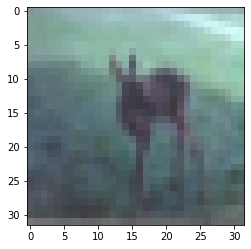

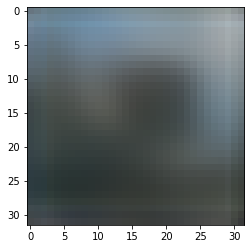

epoch: 1, step: 0, loss: 0.10597434639930725
epoch: 1, step: 200, loss: 0.09310980141162872


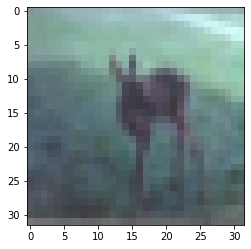

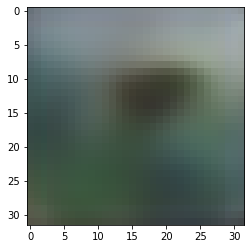

epoch: 2, step: 0, loss: 0.08721877634525299
epoch: 2, step: 200, loss: 0.08616337925195694


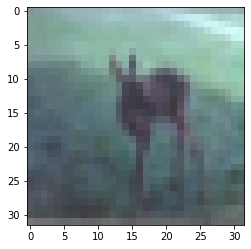

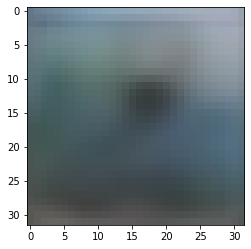

epoch: 3, step: 0, loss: 0.08300760388374329
epoch: 3, step: 200, loss: 0.08146195858716965


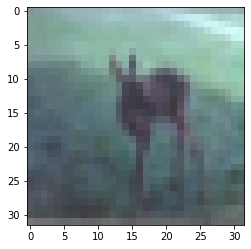

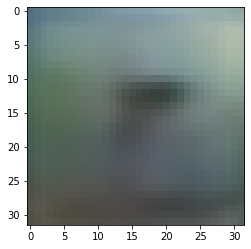

epoch: 4, step: 0, loss: 0.08253130316734314
epoch: 4, step: 200, loss: 0.08478745818138123


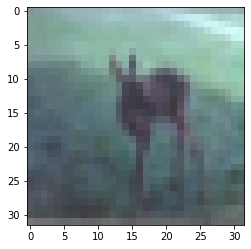

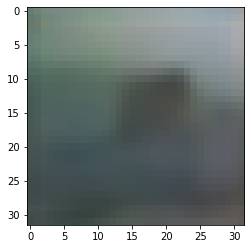

epoch: 5, step: 0, loss: 0.07723389565944672
epoch: 5, step: 200, loss: 0.08196420967578888


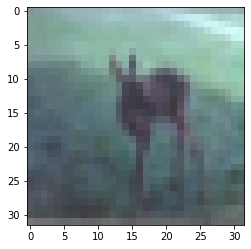

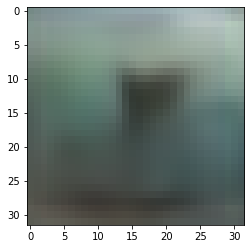

epoch: 6, step: 0, loss: 0.07869594544172287
epoch: 6, step: 200, loss: 0.07846180349588394


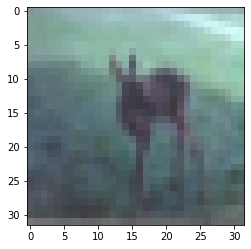

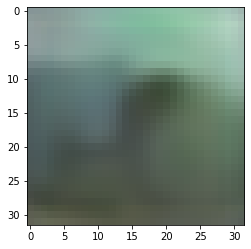

epoch: 7, step: 0, loss: 0.08015862852334976
epoch: 7, step: 200, loss: 0.07906986773014069


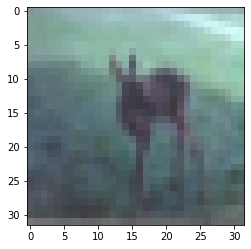

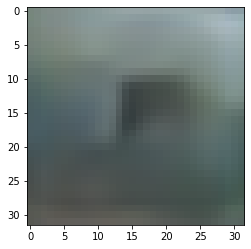

epoch: 8, step: 0, loss: 0.0768948495388031
epoch: 8, step: 200, loss: 0.07686034590005875


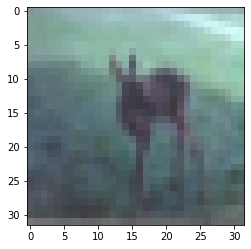

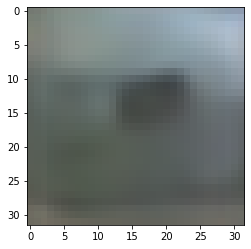

epoch: 9, step: 0, loss: 0.0773058831691742
epoch: 9, step: 200, loss: 0.07279875129461288


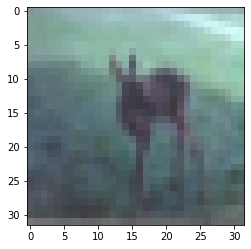

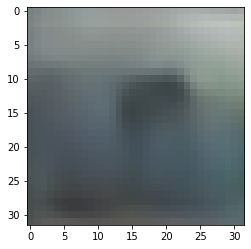

In [112]:
for epoch in range(n_epochs):
    model_VAE.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict, mu, sigma = model_VAE(inputs.to(device))
        loss = loss_func(inputs.to(device), predict) + 0.01 * kl_loss(mu, sigma)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_VAE.state_dict(), f'./Vae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model_VAE.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model_VAE(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()

Исходная картинка:


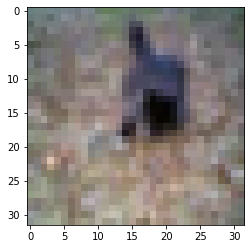

Картинка после обработки на модели:


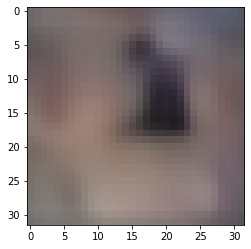

Исходная картинка:


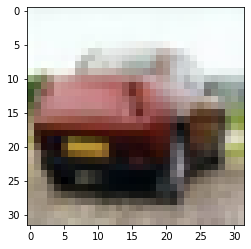

Картинка после обработки на модели:


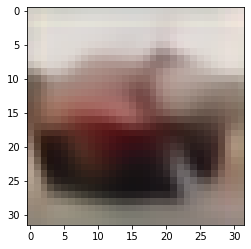

Исходная картинка:


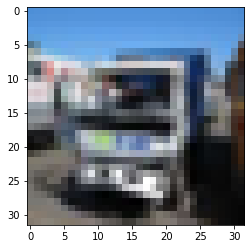

Картинка после обработки на модели:


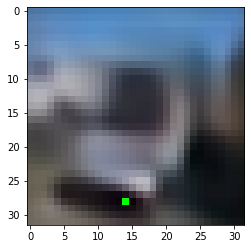

Исходная картинка:


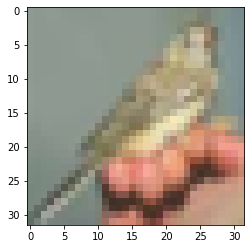

Картинка после обработки на модели:


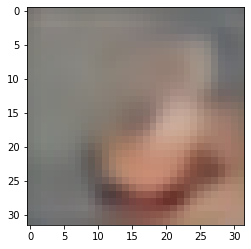

Исходная картинка:


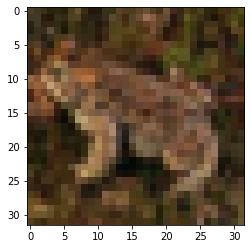

Картинка после обработки на модели:


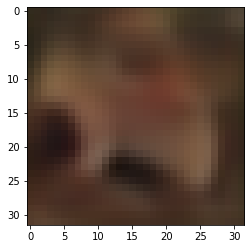

In [114]:
with torch.no_grad():
    model_VAE.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        print('Исходная картинка:')
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        print('Картинка после обработки на модели:')
        plt.imshow(transforms.ToPILImage()(model_VAE(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()
        

По итогу получили неудовлетворительный результат. Попробуем меньше сжимать изображение

In [115]:
class ConvVAEncoder2(nn.Module):
    def __init__(self, input_ch, hidden_ch):
      super().__init__()
      self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                              padding=2)
      self.activ = nn.ReLU()
      self.do1 = nn.Dropout(0.1)
      #self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

      self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                              padding=1)  # 32x32
      self.activ2 = nn.ReLU()
      self.do2 = nn.Dropout(0.1)
      self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 16x16

      self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                      padding=1)
      self.activ3 = nn.ReLU()
      self.do3 = nn.Dropout(0.1)

      self.norm = nn.BatchNorm2d(hidden_ch)

      self.conv4_mu = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 16x16
      self.conv4_sigma = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 16x16

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        #x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        mu = self.conv4_mu(x)
        sigma = torch.exp(self.conv4_sigma(x))

        return mu, sigma



class ConvVADecoder2(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 32x32

        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*2, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x

def sampling(mu, sigma):
    return torch.normal(torch.zeros_like(mu), torch.ones_like(mu)) * sigma + mu

class ConvVAE2(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvVAEncoder2(input_ch, hidden_ch, )
        self.decoder = ConvVADecoder2(input_ch, hidden_ch, )

    def forward(self, x):
        mu, sigma = self.encoder(x)
        hidden = sampling(mu, sigma)
        x_ = self.decoder(hidden)


        return x_, mu, sigma

In [116]:
def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(mu))
    return torch.distributions.kl_divergence(p, q).mean()

model_VAE2 = ConvVAE2(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model_VAE2.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.6111891269683838
epoch: 0, step: 200, loss: 0.10234908014535904


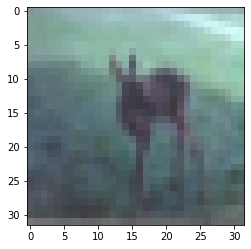

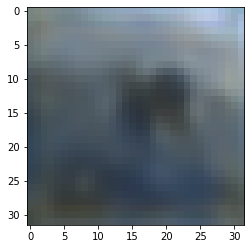

epoch: 1, step: 0, loss: 0.08039665222167969
epoch: 1, step: 200, loss: 0.07618056982755661


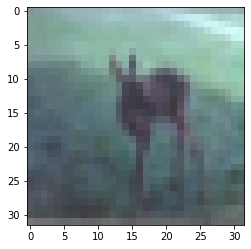

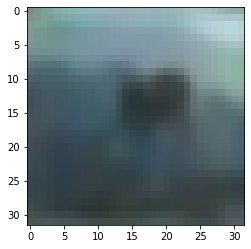

epoch: 2, step: 0, loss: 0.06838563829660416
epoch: 2, step: 200, loss: 0.06798183917999268


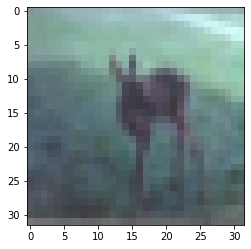

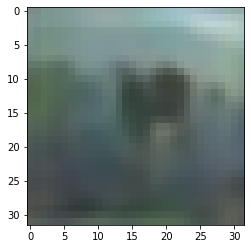

epoch: 3, step: 0, loss: 0.06798608601093292
epoch: 3, step: 200, loss: 0.06383059173822403


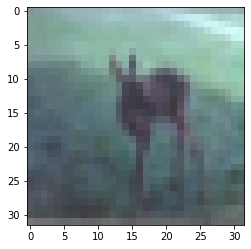

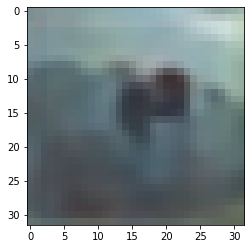

epoch: 4, step: 0, loss: 0.0623287707567215
epoch: 4, step: 200, loss: 0.06187450885772705


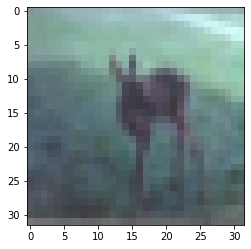

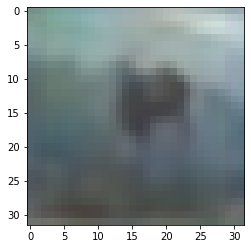

epoch: 5, step: 0, loss: 0.0627308189868927
epoch: 5, step: 200, loss: 234507.34375


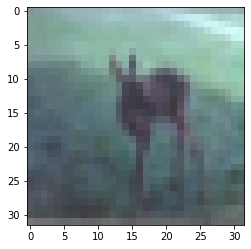

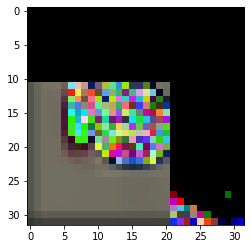

epoch: 6, step: 0, loss: 3283.05078125
epoch: 6, step: 200, loss: 780.4144897460938


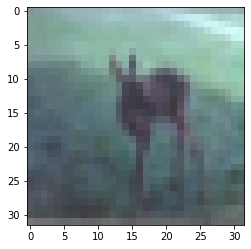

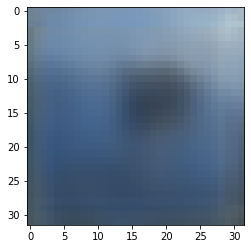

epoch: 7, step: 0, loss: 300.6247253417969
epoch: 7, step: 200, loss: 675.588134765625


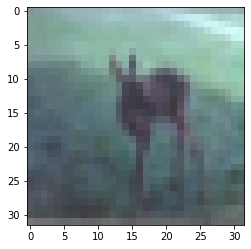

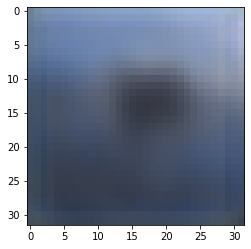

epoch: 8, step: 0, loss: 1505.9678955078125
epoch: 8, step: 200, loss: 583.3751220703125


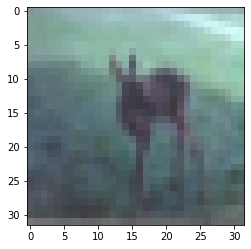

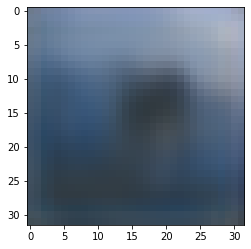

epoch: 9, step: 0, loss: 113.04148864746094
epoch: 9, step: 200, loss: 118.21166229248047


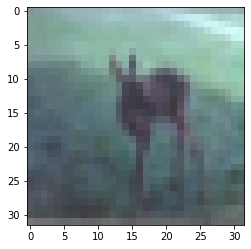

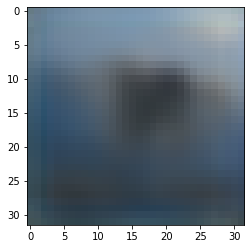

In [117]:
for epoch in range(n_epochs):
    model_VAE2.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict, mu, sigma = model_VAE2(inputs.to(device))
        loss = loss_func(inputs.to(device), predict) + 0.01 * kl_loss(mu, sigma)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_VAE2.state_dict(), f'./Vae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model_VAE2.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model_VAE2(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()

Исходная картинка:


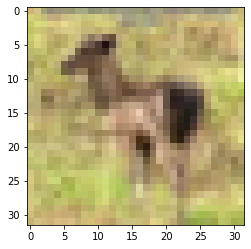

Картинка после обработки на модели:


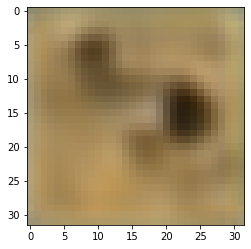

Исходная картинка:


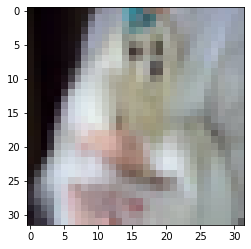

Картинка после обработки на модели:


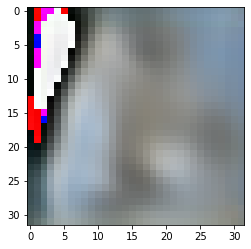

Исходная картинка:


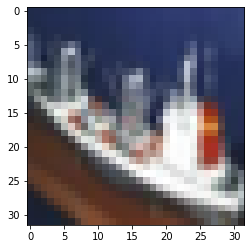

Картинка после обработки на модели:


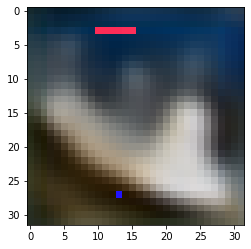

Исходная картинка:


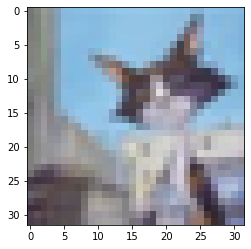

Картинка после обработки на модели:


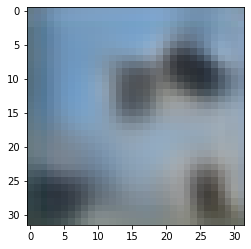

Исходная картинка:


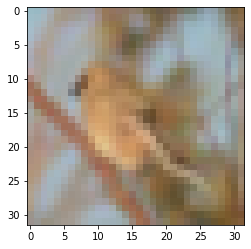

Картинка после обработки на модели:


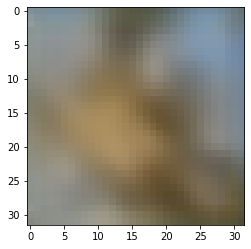

In [118]:
with torch.no_grad():
    model_VAE2.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        print('Исходная картинка:')
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        print('Картинка после обработки на модели:')
        plt.imshow(transforms.ToPILImage()(model_VAE2(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()
        

Модель отработала очень плохо. С 5-й эпохи обучение начало выдавать огромню ошибку. Попробуем немного изменить архитектуру.

In [128]:
class ConvVAEncoder2(nn.Module):
    def __init__(self, input_ch, hidden_ch):
      super().__init__()
      self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                              padding=2)
      self.activ = nn.ReLU()
      self.do1 = nn.Dropout(0.1)
      #self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

      self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                              padding=1)  # 32x32
      self.activ2 = nn.ReLU()
      self.do2 = nn.Dropout(0.1)
      self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 16x16

      self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                      padding=1)
      self.activ3 = nn.ReLU()
      self.do3 = nn.Dropout(0.1)

      self.norm = nn.BatchNorm2d(hidden_ch)

      self.conv4_mu = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 16x16
      self.conv4_sigma = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 16x16

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        #x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.norm(x)
        x = self.activ3(x)
        x = self.do3(x)
        

        mu = self.conv4_mu(x)
        sigma = torch.exp(self.conv4_sigma(x))

        return mu, sigma



class ConvVADecoder2(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch*2, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 32x32

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

        self.norm = nn.BatchNorm2d(hidden_ch)

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.upsample2(x)

        x = self.conv3(x)
        x = self.norm(x)
        x = self.activ3(x)
        x = self.do3(x)

        x = self.conv4(x)

        return x

def sampling(mu, sigma):
    return torch.normal(torch.zeros_like(mu), torch.ones_like(mu)) * sigma + mu

class ConvVAE2(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvVAEncoder2(input_ch, hidden_ch, )
        self.decoder = ConvVADecoder2(input_ch, hidden_ch, )

    def forward(self, x):
        mu, sigma = self.encoder(x)
        hidden = sampling(mu, sigma)
        x_ = self.decoder(hidden)


        return x_, mu, sigma

In [129]:
def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(mu))
    return torch.distributions.kl_divergence(p, q).mean()

model_VAE2 = ConvVAE2(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model_VAE2.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.550443172454834
epoch: 0, step: 200, loss: 0.12773963809013367


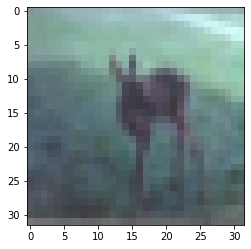

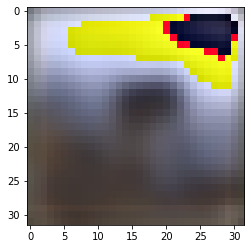

epoch: 1, step: 0, loss: 0.1469385176897049
epoch: 1, step: 200, loss: 0.08744998276233673


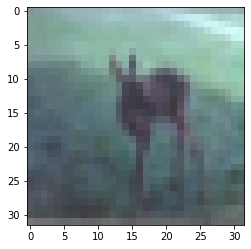

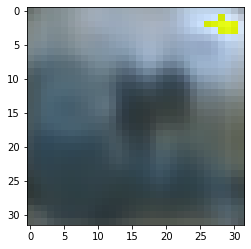

epoch: 2, step: 0, loss: 0.08293099701404572
epoch: 2, step: 200, loss: 0.08153656125068665


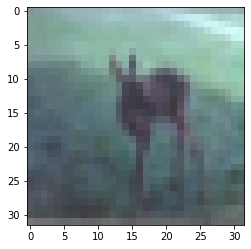

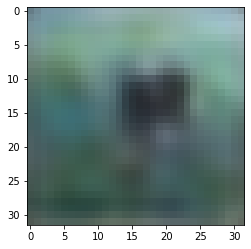

epoch: 3, step: 0, loss: 0.07149918377399445
epoch: 3, step: 200, loss: 0.06679452210664749


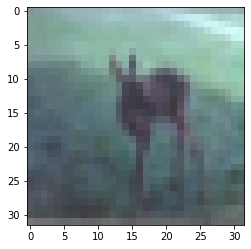

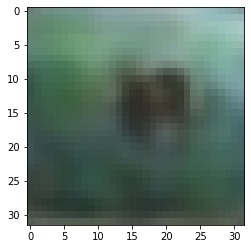

epoch: 4, step: 0, loss: 0.06811388581991196
epoch: 4, step: 200, loss: 0.06533026695251465


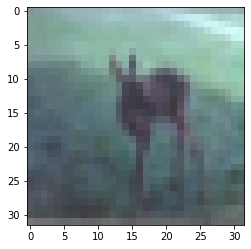

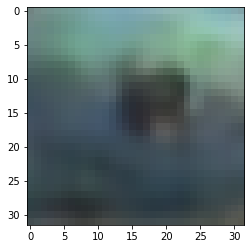

epoch: 5, step: 0, loss: 0.0640815943479538
epoch: 5, step: 200, loss: 0.06434444338083267


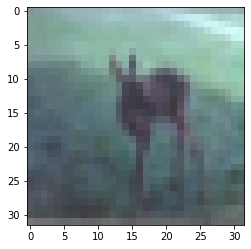

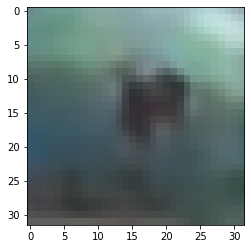

epoch: 6, step: 0, loss: 0.061804644763469696
epoch: 6, step: 200, loss: 0.062068670988082886


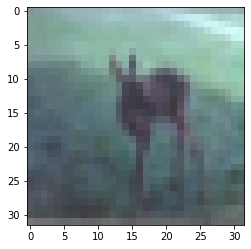

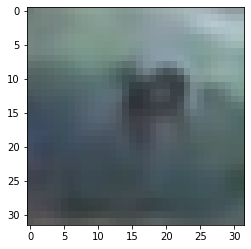

epoch: 7, step: 0, loss: 0.06480418145656586
epoch: 7, step: 200, loss: 0.06033069267868996


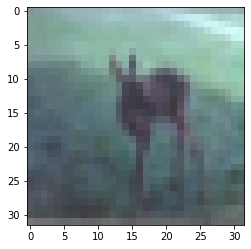

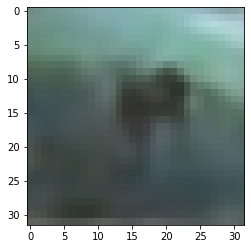

epoch: 8, step: 0, loss: 0.058624207973480225
epoch: 8, step: 200, loss: 0.05675620213150978


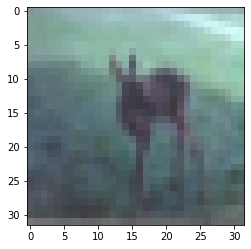

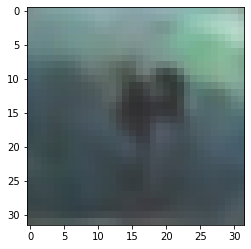

epoch: 9, step: 0, loss: 0.05928373336791992


In [ ]:
for epoch in range(n_epochs):
    model_VAE2.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict, mu, sigma = model_VAE2(inputs.to(device))
        loss = loss_func(inputs.to(device), predict) + 0.01 * kl_loss(mu, sigma)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_VAE2.state_dict(), f'./Vae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model_VAE2.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model_VAE2(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()

**Вывод:** Применение VAE дает очень размытый результат, даже с малым сжатием и малым коэффициентом Кульбака Лейблера. На фото можно увидеть только силуэт, как при применении очень сильного блюр фильтра.
К сожалению, как получились другие тестовые фотографии посмотреть не удалось, т.к. колаб прервал подключение, стер данные чек-поинтов и не дал подключиться вновь к ГПУ. Вычисление на процессоре, по ощущениям, займет несколько дней